In [1]:
import numpy as np
import xarray as xr
import matplotlib as mpl
#mpl.use('Agg') # Must be before importing matplotlib.pyplot or pylab!
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import timeit
#start_time = timeit.default_timer()
from datetime import datetime,timedelta



Plot parameters

In [3]:
mpl.rcParams['axes.linewidth'] = 2.0 #set the value globally

plt.rc('font', family='serif',size = 16)  # controls default text layout
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=16)  # fontsize of the figure title

#plt.minorticks_on()
plt.rc('text', usetex=False)
sns.set(font = "Cambria",font_scale=1.5,style="whitegrid")
#sns.set(font = "Cambria",font_scale=1.5,style="white")

#mpl.rc_file_defaults() #undos seaborn effects

#custom fontsize, if needed
font = 12

%matplotlib inline

## Plot the simulated tower data at the WLEF tall tower for 32 and 122m heights. Both 1 minute, high frequency data and 1 hour averaged data. For winds, T and q. For both the IOP test cases. 

### IOP02 test case

In [3]:
pwd()

'/bog/incoming/CHEESEHEAD/palm/realistic_runs'

In [6]:
#using data from ensemble.member.1
#open all the folders inside and read data from DATA_MASK_NETCDF_N03_M01_slice
#skip if not found.

In [4]:
file_name = 'DATA_MASK_NETCDF_N03_M01slice'
source_folder = 'ches_IOP2/ensemble.member.1'

#get list of all the sub-folders, pertaining to different runs
folder_list = os.listdir(source_folder)

print ('Folder list: ')
simulated_WLEF_data_list = []
#read in the files from the folders and create a list of them 
for i, folder in enumerate(folder_list):
    file = source_folder + '/' + folder + '/' + file_name
    #check if file exists
    if os.path.exists(file):
        print(folder)
        ds = xr.open_dataset(file)
        ds.close()
        #append the data to the list
        simulated_WLEF_data_list.append(ds)
        

#concatenate the list into one dataset and sort it by time 
simulated_WLEF_ds = xr.concat(simulated_WLEF_data_list, dim='time')
simulated_WLEF_ds = simulated_WLEF_ds.sortby('time')

Folder list: 
06.ches_IOP2.31028
04.ches_IOP2.20941
05.ches_IOP2.13864
07.ches_IOP2.19931
08.ches_IOP2.19743
02.ches_IOP2.10023
03.ches_IOP2.28390


In [5]:
simulated_WLEF_ds['time'] = pd.to_datetime('2019-09-24') + simulated_WLEF_ds['time'].values


In [6]:
simulated_WLEF_ds

<xarray.Dataset>
Dimensions:  (x: 3, time: 234001, y: 3, xu: 3, yv: 3, zu_3d: 9, zw_3d: 9)
Coordinates:
  * x        (x) float64 6.069e+03 6.075e+03 6.081e+03
  * y        (y) float64 6.177e+03 6.183e+03 6.189e+03
  * xu       (xu) float64 6.066e+03 6.072e+03 6.078e+03
  * yv       (yv) float64 6.174e+03 6.18e+03 6.186e+03
  * time     (time) datetime64[ns] 2019-09-24T05:00:00.000000175 ... 2019-09-...
  * zu_3d    (zu_3d) float64 26.0 30.0 34.0 94.0 98.0 102.0 194.0 198.0 202.0
  * zw_3d    (zw_3d) float64 28.0 32.0 36.0 96.0 100.0 104.0 196.0 200.0 204.0
Data variables: (12/19)
    E_UTM    (time, x) float64 4.989e+05 4.989e+05 ... 4.989e+05 4.989e+05
    N_UTM    (time, y) float64 6.082e+05 6.082e+05 ... 6.082e+05 6.082e+05
    Eu_UTM   (time, xu) float64 4.989e+05 4.989e+05 ... 4.989e+05 4.989e+05
    Nu_UTM   (time, y) float64 6.082e+05 6.082e+05 ... 6.082e+05 6.082e+05
    Ev_UTM   (time, x) float64 4.989e+05 4.989e+05 ... 4.989e+05 4.989e+05
    Nv_UTM   (time, yv) float64 6.081e+05 6.082e+05 ... 6.082e+05 6.082e+05
    ...       ...
    u        (time, zu_3d, y, xu) float32 -1.056 -1.043 ... -0.08569 -0.07362
    v        (time, zu_3d, yv, x) float32 -0.8337 -0.8085 ... -0.3529 -0.3564
    w        (time, zw_3d, y, x) float32 0.0792 0.06818 ... -0.3379 -0.3185
    theta    (time, zu_3d, y, x) float32 283.4 283.4 283.5 ... 296.1 296.1 296.1
    q        (time, zu_3d, y, x) float32 0.008522 0.008525 ... 0.005993 0.005993
    s        (time, zu_3d, y, x) float32 438.2 438.2 438.2 ... 408.3 408.3 408.3
Attributes: (12/27)
    title:           PALM 21.10-rc.2  run: ches_IOP2.06  nest-id: 03  host: b...
    Conventions:     CF-1.7
    creation_time:   2022-06-22 12:28:01 -06
    data_content:    podsmasked
    version:         7
    origin_time:     2019-08-22 05:00:00 +00
    ...              ...
    source:          PALM 21.10-rc.2
    references:      
    keywords:        example, PALM-4U
    licence:         
    comment:         Generic crossing example
    VAR_LIST:        ;u;v;w;theta;q;s;

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


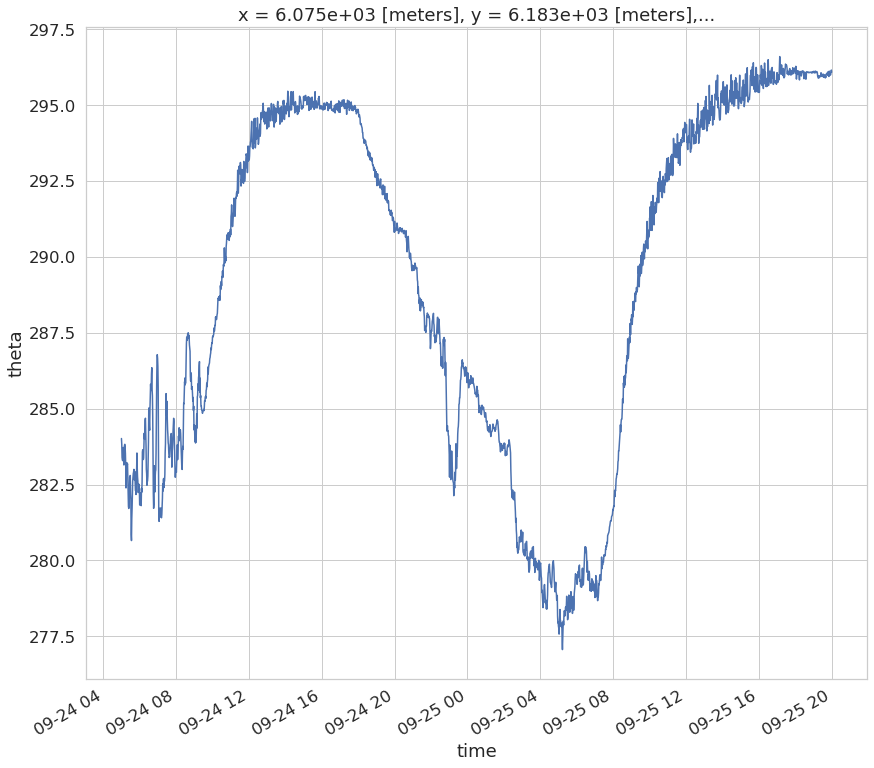

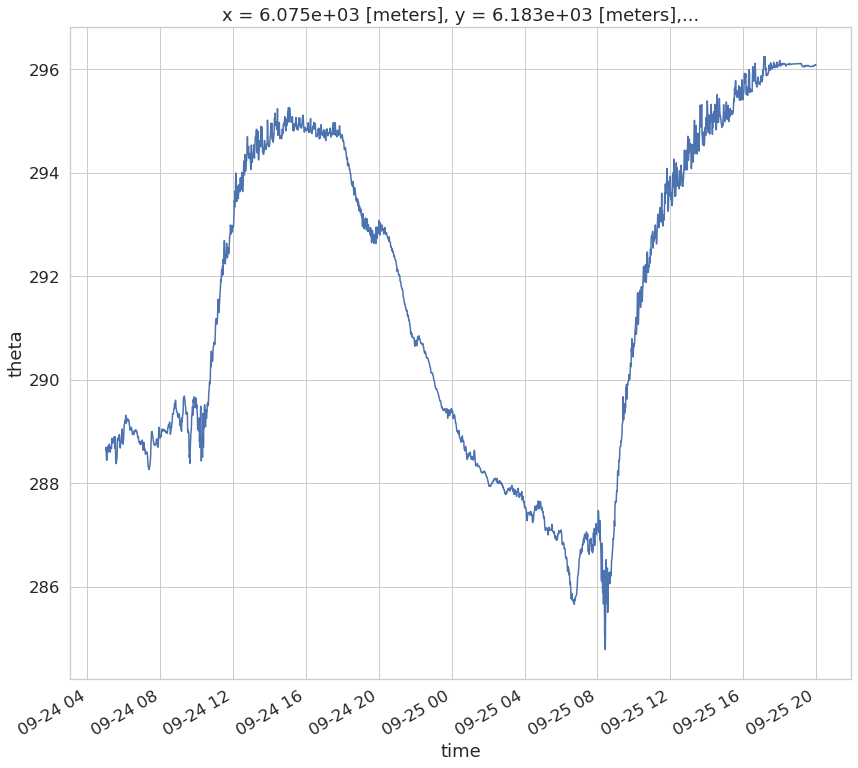

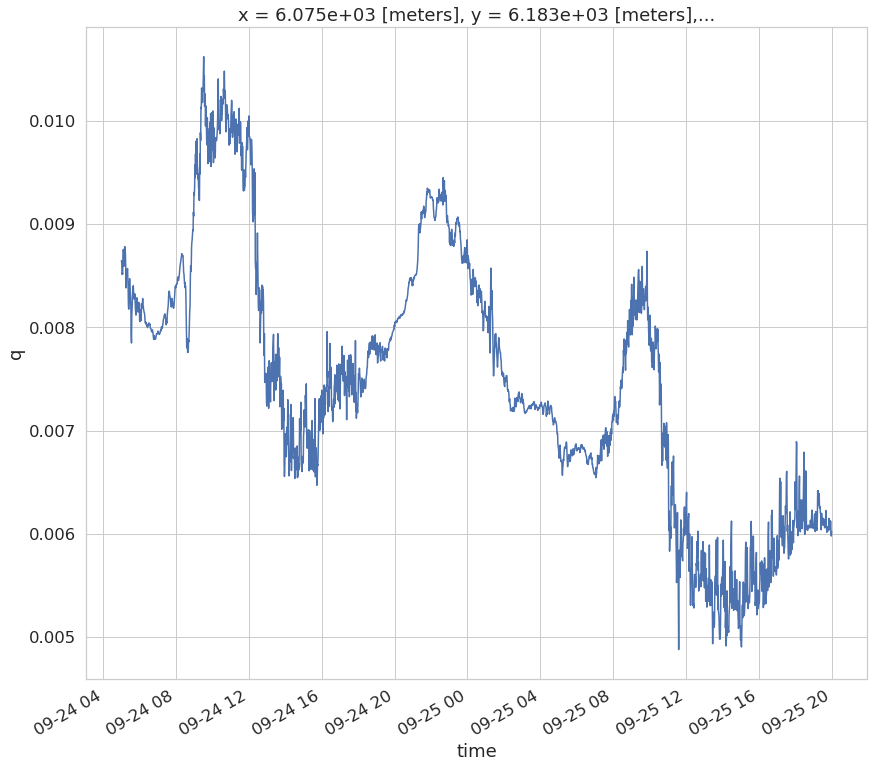

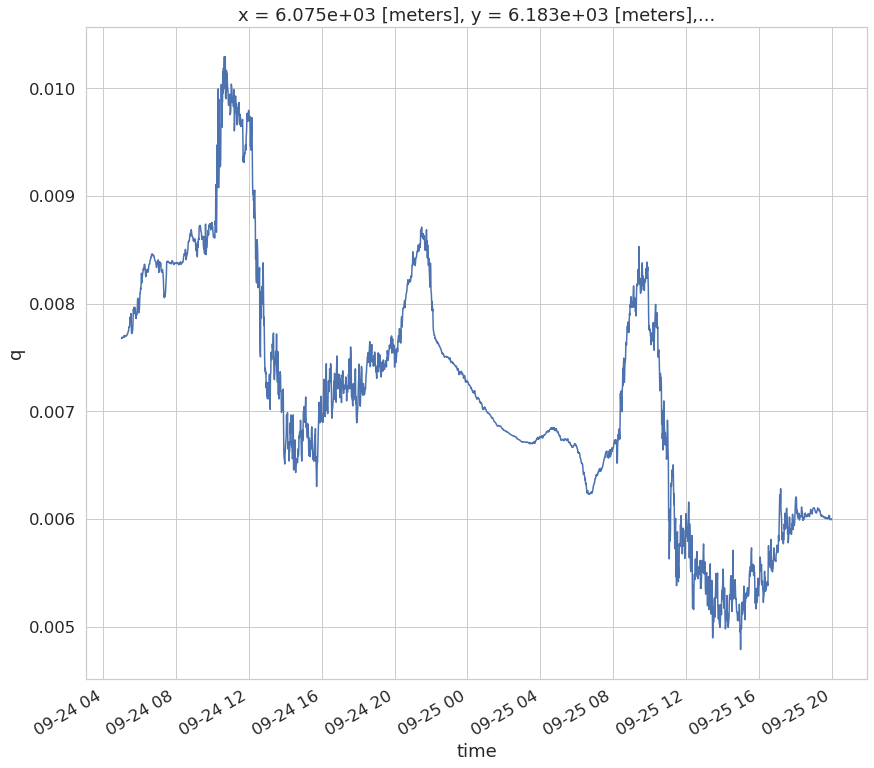

In [7]:
#check the T, q time series at 30, 122 and 396 m
simulated_WLEF_ds.theta.sel(zu_3d=30,x=6075,y=6183).resample(time = '1min').mean().plot(figsize = (14,12))
simulated_WLEF_ds.theta.sel(zu_3d=102,x=6075,y=6183).resample(time = '1min').mean().plot(figsize = (14,12))

simulated_WLEF_ds.q.sel(zu_3d=30,x=6075,y=6183).resample(time = '1min').mean().plot(figsize = (14,12))
simulated_WLEF_ds.q.sel(zu_3d=102,x=6075,y=6183).resample(time = '1min').mean().plot(figsize = (14,12))


In [9]:
#Plotting wind data
#have to extrapolate u, v to w grid.

#read in variables to data arrays, renaming the coords for theta and q to interpolate
w = simulated_WLEF_ds.w.sel(zw_3d=32,x=6075,y=6183).resample(time = '1min').mean()
u_interpolated = simulated_WLEF_ds.u.sel(zu_3d=30,xu=6072,y=6183).resample(time = '1min').mean().rename({'zu_3d': 'zw_3d'}).interp_like(w)
v_interpolated = simulated_WLEF_ds.v.sel(zu_3d=30,x=6075,yv=6180).resample(time = '1min').mean().rename({'zu_3d': 'zw_3d'}).interp_like(w)
wind = np.sqrt(w**2 + u_interpolated**2 + v_interpolated**2 )
#change the time coordinate to datetime format , starting at 2019-09-24
#if you find a timedelta, datatype, just add the date to it and then continue using it. 
#https://stackoverflow.com/questions/62572678/xarray-coords-conversion-to-datetime64
#https://stackoverflow.com/questions/17978092/combine-date-and-time-columns-using-python-pandas/50352414#50352414



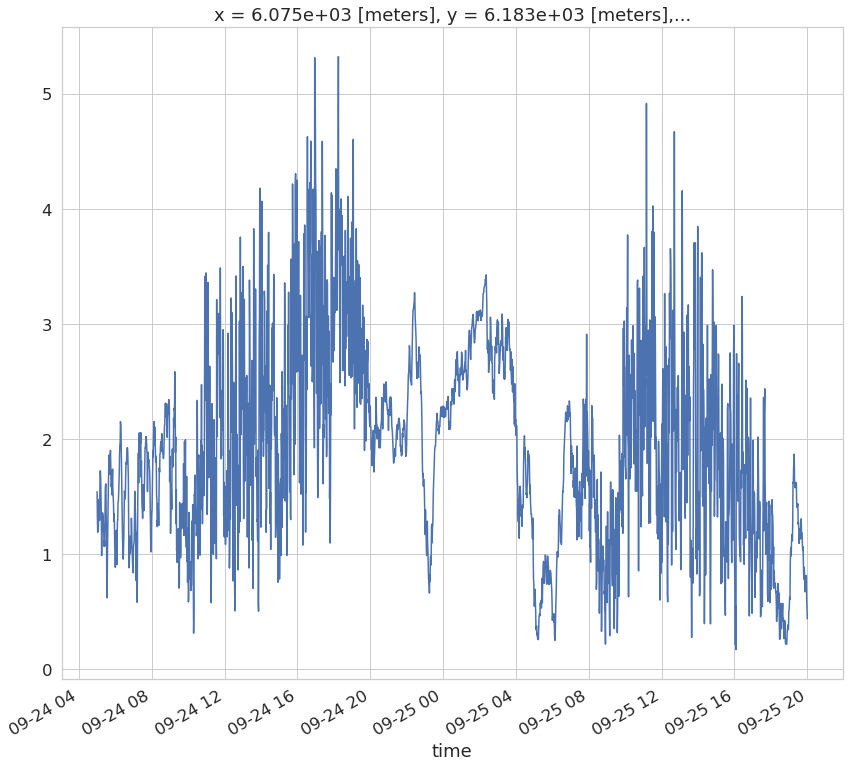

In [14]:
wind.plot(figsize = (14,12))

Notes: Rain event 24th night/evening/ 
Simulations show moisture advection and calm winds??
Interpolated u,v to the w grid. But u and v are offset in the horizontal to w by 3 m :( 
Simulated tower data at 100m, actual tower at 122m :( 

In [9]:
#Trying to extract and plot the 1 minute data from the tall tower for these three fields. 

In [15]:
#define the variable names needed
varNames=['hh','mm','ss','ws30','wsSTD30','wd30','wdSTD30','T30','RH30','q30','ws122','wsSTD122','wd122','wdSTD122','T122','RH122','q122','ws396','wsSTD396','wd396','wdSTD396','T396','RH396','q396','SFCPres','precip','PAR']
# function to read in the variables from a local .txt file, with name filename
# and return a pandas dataframe with the variables in it
# written by Jonathan thom
def readWLEFSlow(filename):
    lines=open(filename,'rt').readlines()

    stamp=[]
    L=[]
    # create an array to write the data with the correct number of columns
    data_only_var_name=varNames[3:]
    for i in range(len(varNames[3:])):
            L.append([])
    print(len(L))
    for j,line in enumerate(lines):
     #   print('line number= ',j)
        line=line.replace('\n','')
        valStr=line.split()
#  make a timestamp from filename and time in the file
        # get filename
        YYYYMMDD=os.path.split(filename)[1][0:8]
        YYYYMMDD=datetime.strptime(YYYYMMDD,'%Y%m%d')
        if valStr[0]=='24':
            valStr[0]='00'
            YYYYMMDD=YYYYMMDD + timedelta(days=1)
        YYYYMMDD=YYYYMMDD.replace(hour=int(valStr[0]))
        YYYYMMDD=YYYYMMDD.replace(minute=int(valStr[1]))
        YYYYMMDD=YYYYMMDD.replace(second=int(valStr[2]))
        stamp.append(YYYYMMDD)
    
        data_only=valStr[3:]
        if len(data_only)<len(data_only_var_name):
            print('short :',len(data_only),j,line)
            for i in range(len(data_only),len(varNames[3:])):
                data_only.append('nan')
        for i,v in enumerate(data_only):
            try:
                dataval=float(v)
            except ValueError:
                dataval=float('nan')
            print(i,v)
            L[i].append(dataval)
    Lnp=np.array(L)
    Lnp=np.transpose(Lnp)
    stampIDX=pd.DatetimeIndex(stamp)
    records=pd.DataFrame(Lnp,index=stampIDX,columns=data_only_var_name)

    return records

In [17]:
#WLEF_20190924_df = readWLEFSlow('/air/incoming/wlef/slow/2019/20190924_towerslow.txt')
#WLEF_20190925_df = readWLEFSlow('/air/incoming/wlef/slow/2019/20190925_towerslow.txt')
#WLEF_20190926_df = readWLEFSlow('/air/incoming/wlef/slow/2019/20190926_towerslow.txt')

In [18]:
WLEF_20190924_df

ws30  wsSTD30    wd30  wdSTD30     T30    RH30     q30  \
2019-09-24 00:00:00    1.74     0.21  250.67     6.97   17.60   60.05    7.94   
2019-09-24 00:01:00    1.43     0.23  245.86     8.79   17.57   60.24    7.95   
2019-09-24 00:02:00    1.47     0.21  247.24     8.24   17.54   60.37    7.96   
2019-09-24 00:03:00    1.53     0.31  252.22     5.67   17.48   60.92    8.00   
2019-09-24 00:04:00    1.49     0.26  248.44     6.26   17.41   60.97    7.97   
...                     ...      ...     ...      ...     ...     ...     ...   
2019-09-24 23:55:00 -999.00  -999.00 -999.00  -999.00   21.24   76.71   12.98   
2019-09-24 23:56:00 -999.00  -999.00 -999.00  -999.00   21.20   76.63   12.94   
2019-09-24 23:57:00 -999.00  -999.00 -999.00  -999.00   21.19   76.70   12.94   
2019-09-24 23:58:00 -999.00  -999.00 -999.00  -999.00   21.19   76.86   12.97   
2019-09-24 23:59:00 -999.00  -999.00 -999.00  -999.00 -999.00 -999.00 -999.00   

                      ws122  wsSTD122   wd122  ...   ws396  wsSTD396   wd396  \
2019-09-24 00:00:00    6.41      0.13  266.82  ...    8.66      0.15  270.20   
2019-09-24 00:01:00    6.34      0.25  264.77  ...    8.80      0.15  270.25   
2019-09-24 00:02:00    6.44      0.29  264.66  ...    8.49      0.20  271.00   
2019-09-24 00:03:00    6.67      0.22  266.08  ...    8.04      0.17  269.08   
2019-09-24 00:04:00    6.76      0.12  266.08  ...    8.30      0.22  270.94   
...                     ...       ...     ...  ...     ...       ...     ...   
2019-09-24 23:55:00 -999.00   -999.00 -999.00  ... -999.00   -999.00 -999.00   
2019-09-24 23:56:00 -999.00   -999.00 -999.00  ... -999.00   -999.00 -999.00   
2019-09-24 23:57:00 -999.00   -999.00 -999.00  ... -999.00   -999.00 -999.00   
2019-09-24 23:58:00 -999.00   -999.00 -999.00  ... -999.00   -999.00 -999.00   
2019-09-24 23:59:00 -999.00   -999.00 -999.00  ... -999.00   -999.00 -999.00   

                     wdSTD396    T396   RH396    q396  SFCPres  precip     PAR  
2019-09-24 00:00:00      0.56   15.79   57.19    6.73    95.77     0.0    5.17  
2019-09-24 00:01:00      1.09   15.79   57.39    6.75    95.77     0.0    4.44  
2019-09-24 00:02:00      0.95   15.79   57.59    6.78    95.77     0.0    3.76  
2019-09-24 00:03:00      1.45   15.79   57.73    6.79    95.78     0.0    3.06  
2019-09-24 00:04:00      1.37   15.79   57.88    6.81    95.78     0.0    2.45  
...                       ...     ...     ...     ...      ...     ...     ...  
2019-09-24 23:55:00   -999.00   19.31   79.57   11.93    94.65     0.0    2.99  
2019-09-24 23:56:00   -999.00   19.31   79.66   11.95    94.64     0.0    2.72  
2019-09-24 23:57:00   -999.00   19.31   79.71   11.95    94.64     0.0    2.40  
2019-09-24 23:58:00   -999.00   19.31   79.75   11.96    94.63     0.0    2.11  
2019-09-24 23:59:00   -999.00 -999.00 -999.00 -999.00  -999.00  -999.0 -999.00  

[1440 rows x 24 columns]

In [46]:
WLEF_df = pd.DataFrame()
WLEF_df = pd.concat([WLEF_20190924_df,WLEF_20190925_df,WLEF_20190926_df])['2019-09-24 05:00:00' :'2019-09-26 05:00:00']
#change the timestamp fro UTC to CDT
WLEF_df['Timestamp'] = (WLEF_df.index + pd.Timedelta(-5, "h"))
#WLEF_df['Timestamp']
WLEF_df WLEF_df.set_index('Timestamp')
WLEF_df

ws30  wsSTD30    wd30  wdSTD30    T30   RH30   q30  \
2019-09-24 05:00:00  2.53     0.35  223.11     7.12  12.46  82.10  7.80   
2019-09-24 05:01:00  2.28     0.51  222.09     7.41  12.48  81.90  7.79   
2019-09-24 05:02:00  2.24     0.50  225.87     7.84  12.55  81.60  7.80   
2019-09-24 05:03:00  2.08     0.54  226.14     8.71  12.59  81.50  7.81   
2019-09-24 05:04:00  2.02     0.31  222.46     7.22  12.58  81.60  7.81   
...                   ...      ...     ...      ...    ...    ...   ...   
2019-09-26 04:56:00  2.88     0.76  270.15    14.76   9.57  72.34  5.68   
2019-09-26 04:57:00  3.30     0.65  277.63    12.01   9.57  72.63  5.71   
2019-09-26 04:58:00  2.68     0.53  275.87    12.52   9.54  72.69  5.70   
2019-09-26 04:59:00  3.03     0.82  281.42    14.56   9.54  72.62  5.69   
2019-09-26 05:00:00  2.99     0.99  267.06    15.81   9.51  72.84  5.70   

                      ws122  wsSTD122   wd122  ...  wsSTD396   wd396  \
2019-09-24 05:00:00    9.99      0.06  257.23  ...      0.02  264.51   
2019-09-24 05:01:00   10.02      0.12  257.85  ...      0.02  264.70   
2019-09-24 05:02:00    9.88      0.09  257.72  ...      0.04  265.11   
2019-09-24 05:03:00    9.55      0.13  255.64  ...      0.02  265.59   
2019-09-24 05:04:00    9.21      0.14  253.02  ...      0.03  266.15   
...                     ...       ...     ...  ...       ...     ...   
2019-09-26 04:56:00 -999.00   -999.00 -999.00  ...      0.20  295.05   
2019-09-26 04:57:00 -999.00   -999.00 -999.00  ...      0.18  295.22   
2019-09-26 04:58:00 -999.00   -999.00 -999.00  ...      0.10  294.42   
2019-09-26 04:59:00 -999.00   -999.00 -999.00  ...      0.12  294.93   
2019-09-26 05:00:00 -999.00   -999.00 -999.00  ...      0.11  294.60   

                     wdSTD396   T396  RH396  q396  SFCPres  precip   PAR  \
2019-09-24 05:00:00      0.07  15.88  53.50  6.33    95.77     0.0  0.00   
2019-09-24 05:01:00      0.11  15.88  53.46  6.32    95.77     0.0  0.01   
2019-09-24 05:02:00      0.14  15.88  53.43  6.32    95.77     0.0  0.06   
2019-09-24 05:03:00      0.17  15.89  53.36  6.32    95.77     0.0  0.11   
2019-09-24 05:04:00      0.15  15.93  53.31  6.33    95.77     0.0  0.12   
...                       ...    ...    ...   ...      ...     ...   ...   
2019-09-26 04:56:00      0.64   8.21  65.51  4.69    95.27     0.0  0.11   
2019-09-26 04:57:00      0.51   8.22  65.25  4.67    95.27     0.0  0.10   
2019-09-26 04:58:00      0.50   8.28  64.84  4.66    95.27     0.0  0.11   
2019-09-26 04:59:00      0.53   8.31  65.11  4.69    95.27     0.0  0.09   
2019-09-26 05:00:00      0.48   8.31  65.32  4.71    95.27     0.0  0.09   

                              Timestamp  
2019-09-24 05:00:00 2019-09-24 00:00:00  
2019-09-24 05:01:00 2019-09-24 00:01:00  
2019-09-24 05:02:00 2019-09-24 00:02:00  
2019-09-24 05:03:00 2019-09-24 00:03:00  
2019-09-24 05:04:00 2019-09-24 00:04:00  
...                                 ...  
2019-09-26 04:56:00 2019-09-25 23:56:00  
2019-09-26 04:57:00 2019-09-25 23:57:00  
2019-09-26 04:58:00 2019-09-25 23:58:00  
2019-09-26 04:59:00 2019-09-25 23:59:00  
2019-09-26 05:00:00 2019-09-26 00:00:00  

[2881 rows x 25 columns]

In [41]:
WLEF_ws30_df_nan = WLEF_df['ws30'].copy()
WLEF_ws30_df_nan[WLEF_ws30_df_nan<-100]=np.nan

WLEF_T30_df_nan = WLEF_df['T30'].copy()
WLEF_T30_df_nan[WLEF_T30_df_nan<-100]=np.nan

WLEF_q30_df_nan = WLEF_df['q30'].copy()
WLEF_q30_df_nan[WLEF_q30_df_nan<-100]=np.nan

<AxesSubplot:>

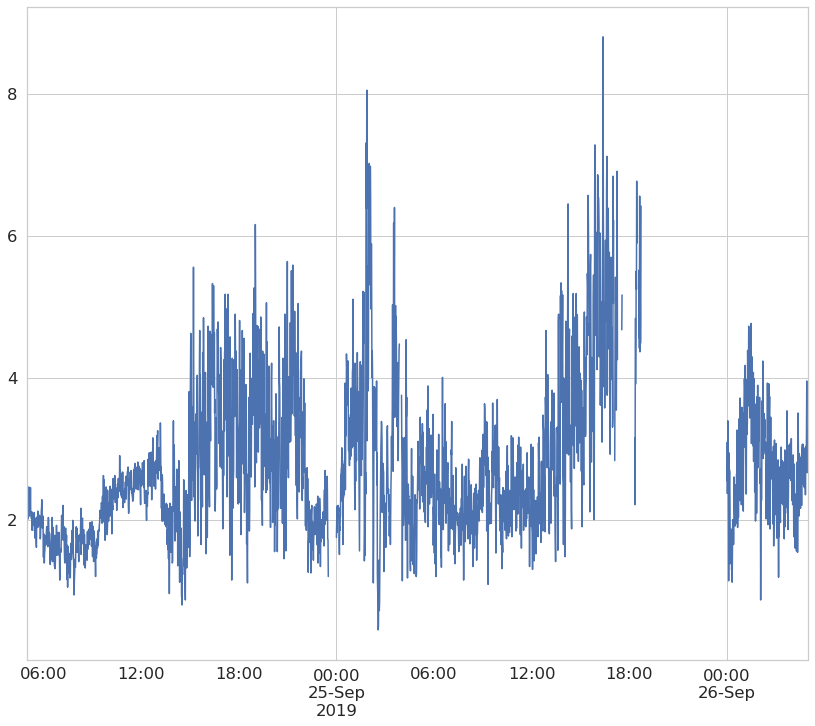

In [42]:
WLEF_ws30_df_nan.plot(figsize = (14,12))

<AxesSubplot:>

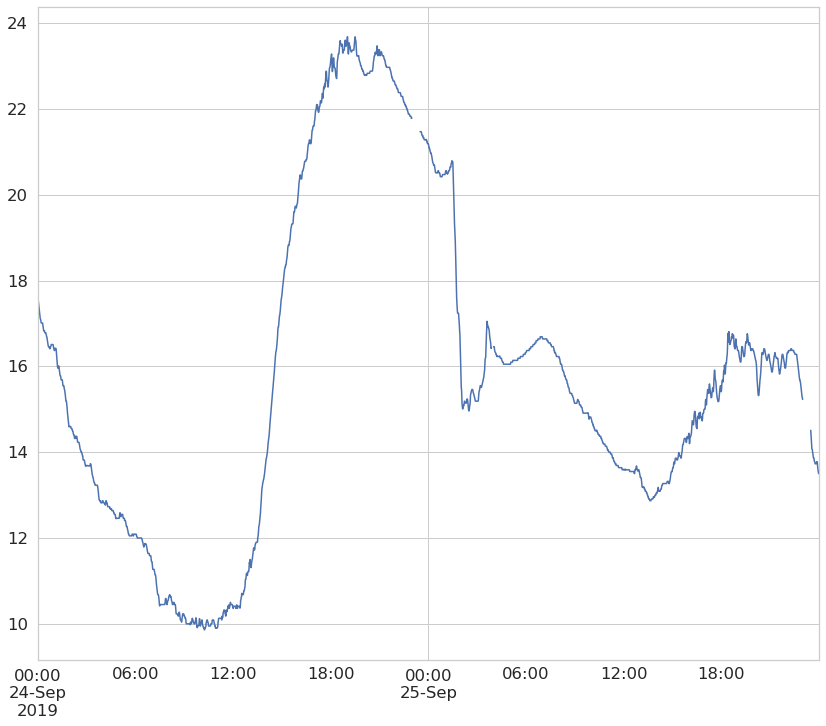

In [29]:
WLEF_T30_df_nan.plot(figsize = (14,12))

<AxesSubplot:>

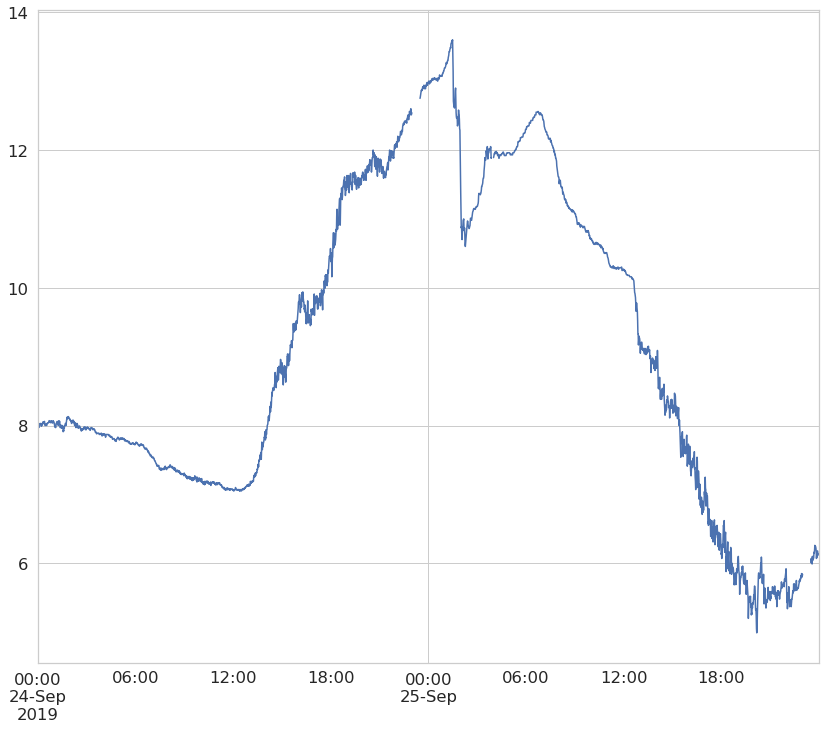

In [30]:
WLEF_q30_df_nan.plot(figsize = (14,12))

Have to adjust for the change in UTC for the WLEF data